In [11]:
import numpy as np
import matplotlib.pyplot as plt
import acceleration_analysis as sp
import splatt_utilities as utils

utils.buffsync()

Synchronizing buffer folder ...
receiving file list ... done
./
20250328_163516/
20250328_163516/addrR1.fits
20250328_163516/addrR2.fits
20250328_163516/addrW1.fits
20250328_163516/addrW2.fits
20250328_163516/channel.fits
20250328_163516/dataR1.fits
20250328_163516/dataR2.fits
20250328_163516/dataW1.fits
20250328_163516/dataW2.fits
20250328_163516/decimation.fits
20250401_130458/
20250401_130458/addrR1.fits
20250401_130458/addrR2.fits
20250401_130458/dataR1.fits
20250401_130458/dataR2.fits
20250401_130458/decimation.fits
20250408_165406/
20250408_165406/addrR1.fits
20250408_165406/addrR2.fits
20250408_165406/addrW1.fits
20250408_165406/addrW2.fits
20250408_165406/channel.fits
20250408_165406/dataR1.fits
20250408_165406/dataR2.fits
20250408_165406/dataW1.fits
20250408_165406/dataW2.fits
20250408_165406/decimation.fits
20250408_165700/
20250408_165700/addrR1.fits
20250408_165700/addrR2.fits
20250408_165700/addrW1.fits
20250408_165700/addrW2.fits
20250408_165700/channel.fits
20250408_1657

In [12]:
freq_vec = [10.1,22.6,33.9,46.3,56.0,71.3,82.0,92.7,107.0,117.6]
tn_list = ['20250409_094234','20250409_094332','20250409_094430','20250409_094527','20250409_094624','20250409_094721','20250409_094817','20250409_094914','20250409_095010','20250409_095107']
wdf_list = ['OBB-Vibration_2025-04-09T09-42-35-158.wdd','OBB-Vibration_2025-04-09T09-43-33-037.wdd','OBB-Vibration_2025-04-09T09-44-30-580.wdd','OBB-Vibration_2025-04-09T09-45-28-179.wdd','OBB-Vibration_2025-04-09T09-46-24-829.wdd','OBB-Vibration_2025-04-09T09-47-21-605.wdd','OBB-Vibration_2025-04-09T09-48-17-970.wdd','OBB-Vibration_2025-04-09T09-49-14-477.wdd','OBB-Vibration_2025-04-09T09-50-11-061.wdd','OBB-Vibration_2025-04-09T09-51-07-640.wdd']

coords = np.loadtxt('../SPLATT_Data/act_coords.txt')
x,y = coords[:,0], coords[:,1]
piston = np.ones(len(coords))
tip = x/np.max(np.abs(coords))
tilt = y/np.max(np.abs(coords))

modalMat = np.stack((piston.T,tip.T,tilt.T),axis=1)
print(modalMat)

[[ 1.00000000e+00  0.00000000e+00 -0.00000000e+00]
 [ 1.00000000e+00  3.05336466e-17 -4.98652291e-01]
 [ 1.00000000e+00 -4.31845552e-01 -2.49326146e-01]
 [ 1.00000000e+00 -4.31845552e-01  2.49326146e-01]
 [ 1.00000000e+00 -9.16009398e-17  4.98652291e-01]
 [ 1.00000000e+00  4.31845552e-01  2.49326146e-01]
 [ 1.00000000e+00  4.31845552e-01 -2.49326146e-01]
 [ 1.00000000e+00  6.12323400e-17 -1.00000000e+00]
 [ 1.00000000e+00 -5.00000000e-01 -8.66025404e-01]
 [ 1.00000000e+00 -8.66025404e-01 -5.00000000e-01]
 [ 1.00000000e+00 -1.00000000e+00 -1.22464680e-16]
 [ 1.00000000e+00 -8.66025404e-01  5.00000000e-01]
 [ 1.00000000e+00 -5.00000000e-01  8.66025404e-01]
 [ 1.00000000e+00 -1.83697020e-16  1.00000000e+00]
 [ 1.00000000e+00  5.00000000e-01  8.66025404e-01]
 [ 1.00000000e+00  8.66025404e-01  5.00000000e-01]
 [ 1.00000000e+00  1.00000000e+00  2.44929360e-16]
 [ 1.00000000e+00  8.66025404e-01 -5.00000000e-01]
 [ 1.00000000e+00  5.00000000e-01 -8.66025404e-01]]


REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]


(19, 256)
(19, 256)
(19, 256)
(19, 256)
(19, 256)


REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]
REVISION = '$Rev::             $'                                                [astropy.io.fits.card]


(19, 256)
(19, 256)
(19, 256)
(19, 256)
(19, 256)


REVISION = '$Rev::             $'                                                [astropy.io.fits.card]


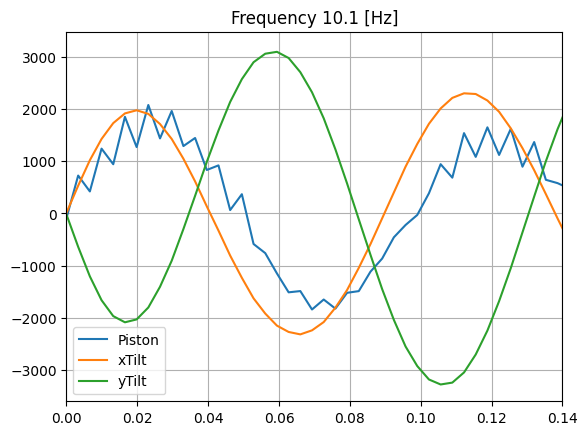

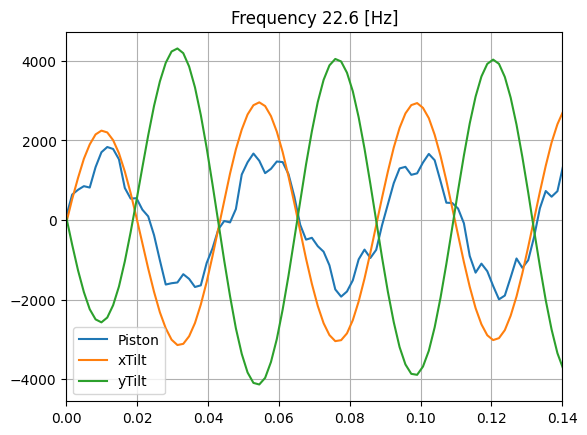

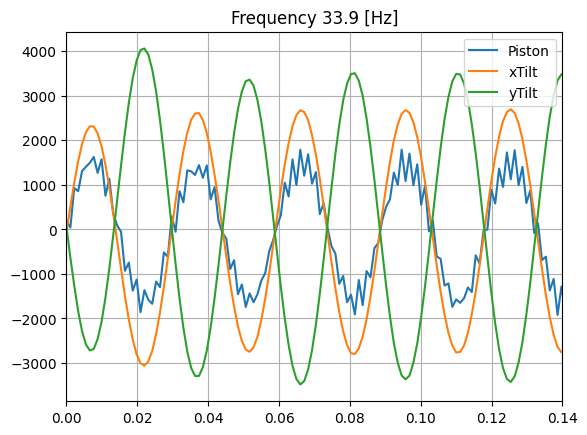

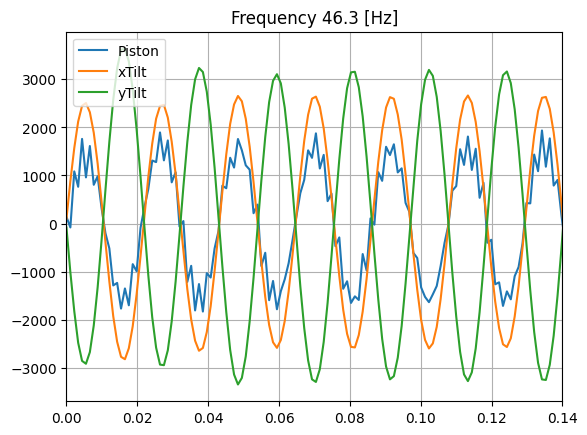

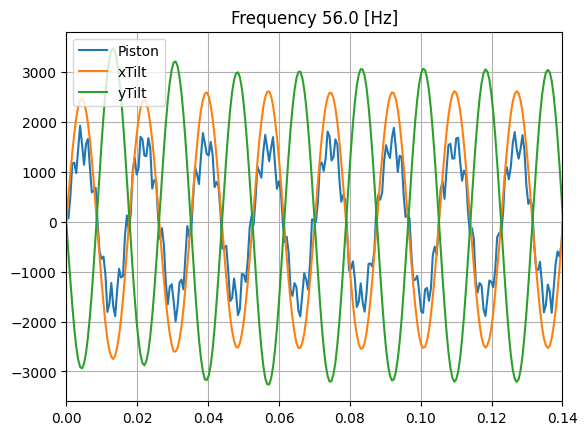

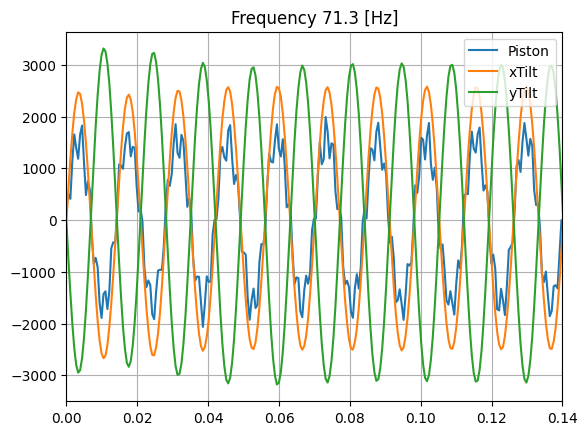

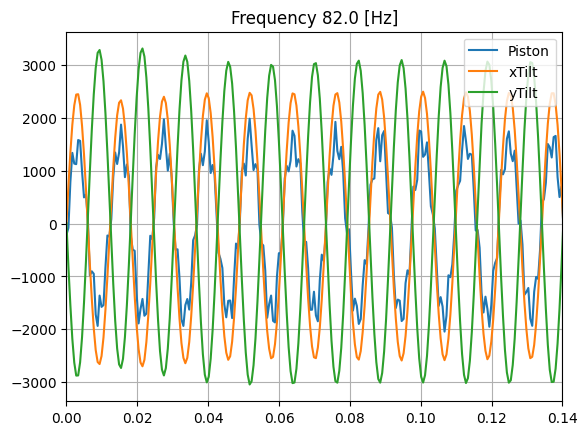

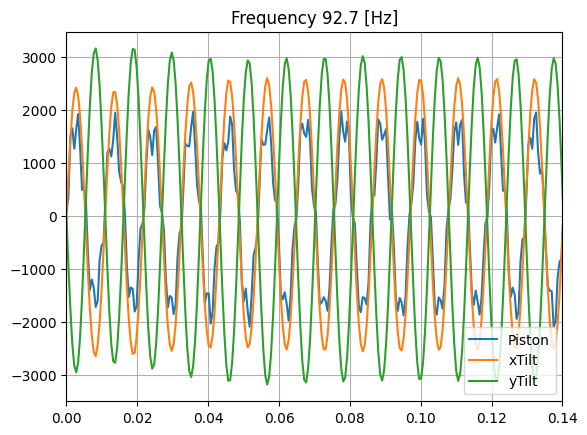

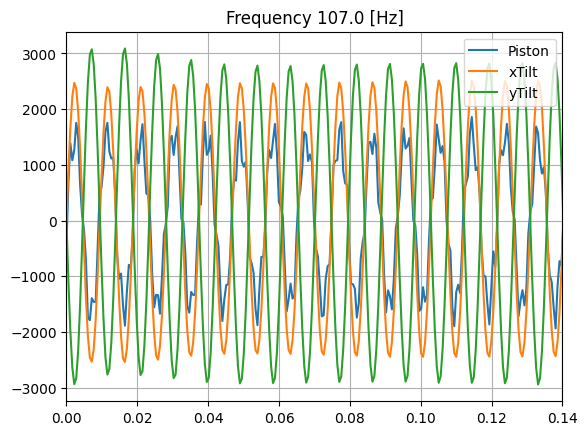

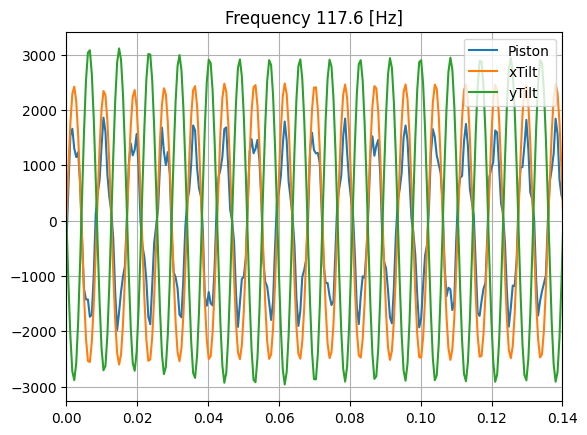

In [32]:
for k,fr in enumerate(freq_vec):

    wdf = wdf_list[k]
    tn = tn_list[k]

    buf,tbuf = utils.read_buffer_data(tn)
    pos = buf['sabi32_pidCoilOut']
    dpos = pos - np.reshape(np.mean(pos,axis=1),[19,1])
    dmode = modalMat.T @ dpos

    plt.figure()
    plt.plot(tbuf.T, dmode.T)
    plt.grid(True)
    plt.legend(('Piston','xTilt','yTilt'))
    plt.title(f'Frequency {fr} [Hz]')
    plt.xlim([0,0.14])

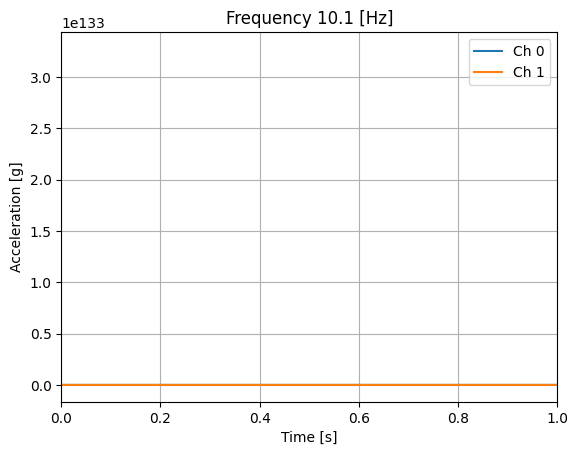

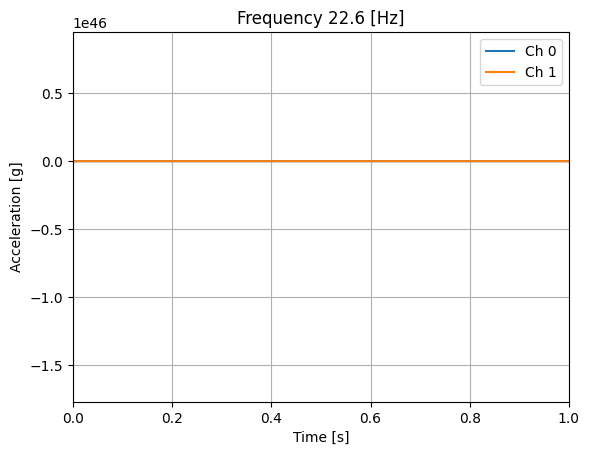

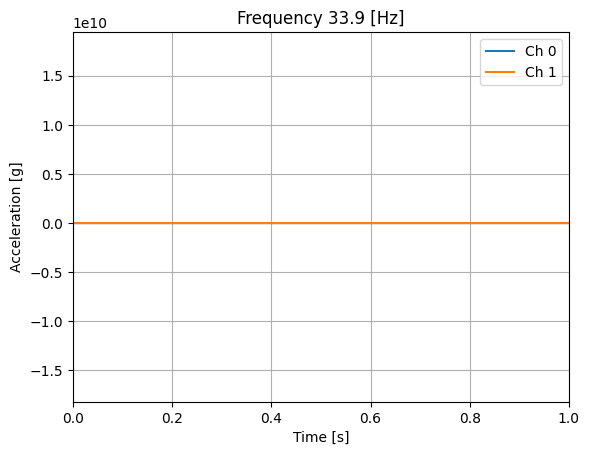

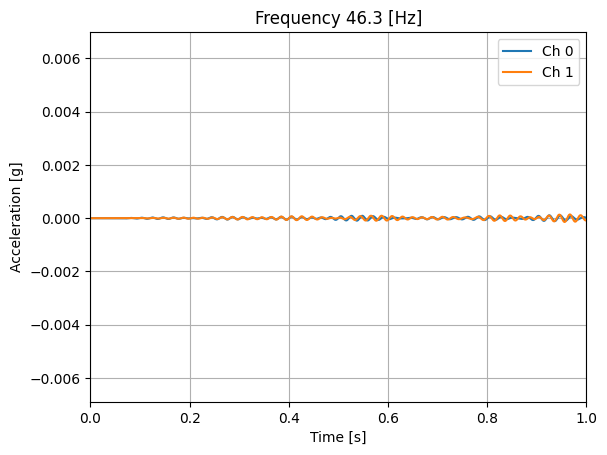

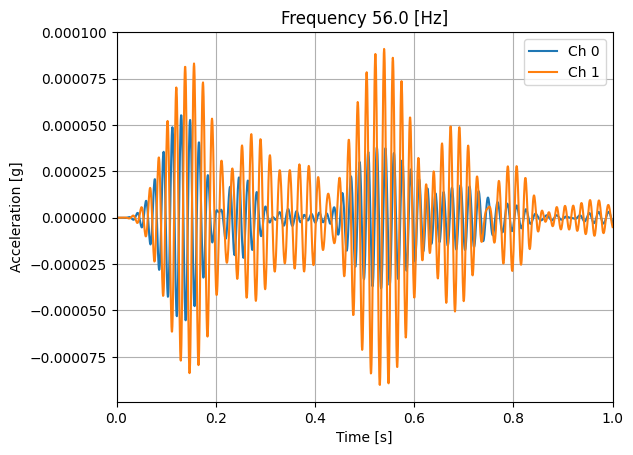

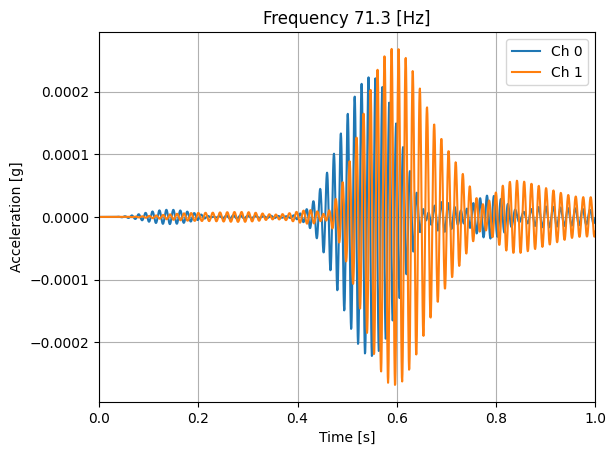

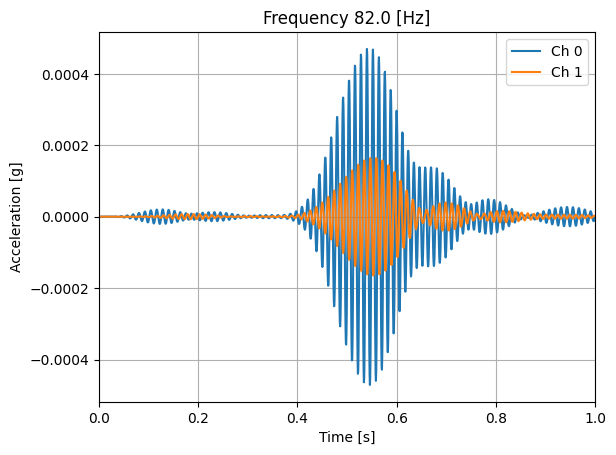

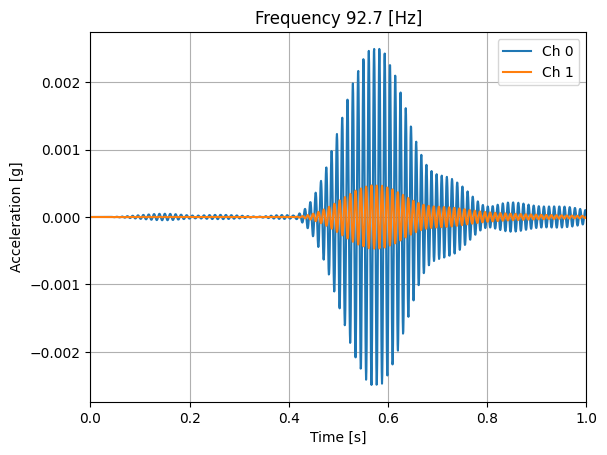

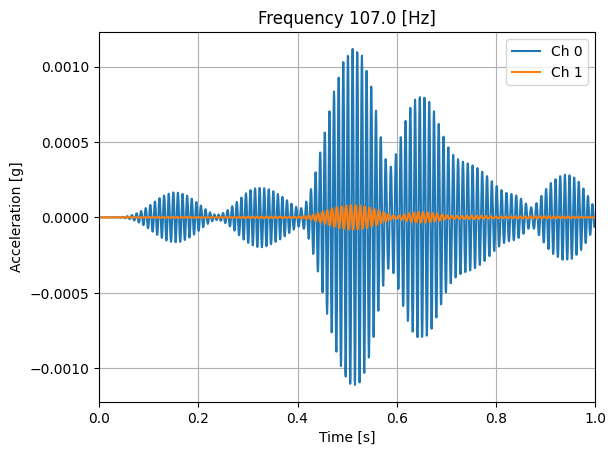

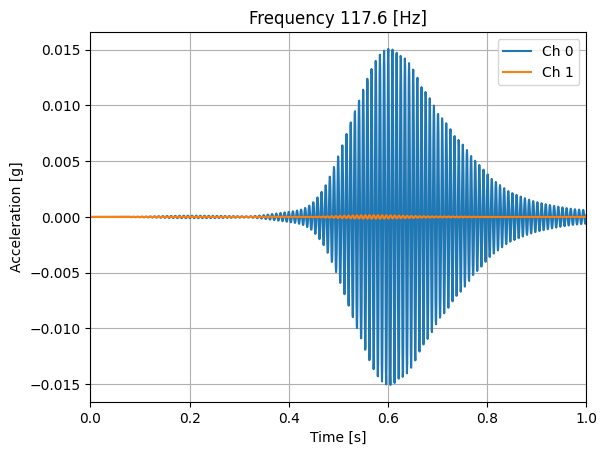

In [33]:
f_WebDAQ = 1651.6129 
for k,fr in enumerate(freq_vec):

    wdf = wdf_list[k]

    data = sp.openfile(wdf)
    tacc = np.arange(np.shape(data)[1])/f_WebDAQ

    f_min = np.max((7,fr - 5))
    f_max = fr + 5
    bwf0 = sp.butterworth_bandpass_filter(data[0],f_low = f_min, f_high = f_max,f_sample = f_WebDAQ)
    bwf1 = sp.butterworth_bandpass_filter(data[1],f_low = f_min, f_high = f_max,f_sample = f_WebDAQ)

    plt.figure()
    plt.title(f'Frequency {fr} [Hz]')
    plt.plot(tacc,bwf0,label='Ch 0')
    plt.plot(tacc,bwf1,label='Ch 1')
    plt.legend()
    plt.xlabel('Time [s]')
    plt.ylabel('Acceleration [g]')
    plt.grid('on')
    plt.axis('tight')
    plt.xlim([0,1])